# Data Preprocessing

### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
#tensor uses all of the vram or memory in ur machine when we load something in it. so for that,
#These two particular lines of code will help us precent that and also help us solve the OOM error (out of memory error)


#To get all the gpus
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 
    #Here we are saying, dont use all the memory keep it to absolutely what you need

gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Importing the dataset and viewing it

In [3]:
#importing the dataset using pandas
dataset = pd.read_csv('data/credit_card_fraud.csv')
dataset.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [4]:
#Checking the number of rows and cols
dataset.shape

(339607, 15)

### Viewing all the column names and its datatypes

In [5]:
dataset.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
# Generate descriptive statistics of the data distribtion
dataset.describe()  

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


### Generate descriptive statistics

In [7]:
#Observing the datatypes of each column
dataset.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

# Checking for missing values

In [8]:
#Checking for missing values
dataset.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no missing values to be found in the dataset.

### Checking for duplicates

In [9]:
#Number of duplicated samples
dataset.duplicated().sum()

0

There are no duplicate values to be found in the dataset

## Exploring data, visualising it and understanding it

In [10]:
#Checking for the number of values under each class
dataset.is_fraud.value_counts()

is_fraud
0    337825
1      1782
Name: count, dtype: int64

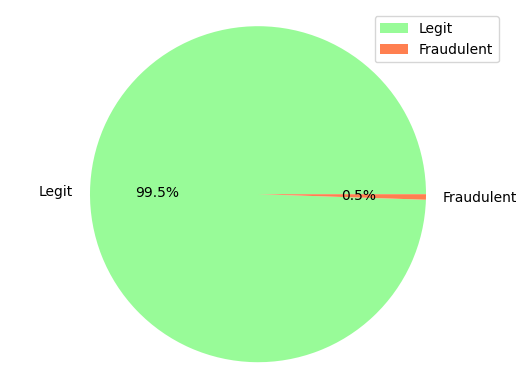

In [11]:
#Plotting the data distribution of the target variable

plt.pie(dataset.is_fraud.value_counts(), labels = ['Legit', 'Fraudulent'], colors = ['palegreen', 'coral'], autopct = '%.1f%%')
plt.legend()
plt.axis('equal')
plt.show()

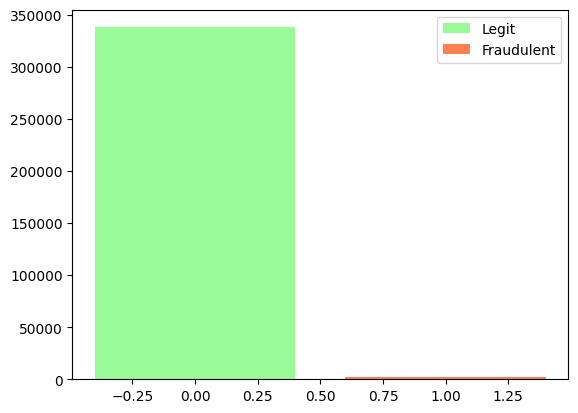

In [12]:
#Plotting the bar plot for is_fraud distribution of classes

legit = dataset[dataset['is_fraud'] == 0]
fraudulent = dataset[dataset['is_fraud'] == 1]

plt.bar(0, len(legit), color='palegreen', label='Legit')
plt.bar(1, len(fraudulent), color='coral', label='Fraudulent')

plt.legend(loc='upper right')
plt.show()

Based on the visualization, it is evident that our dataset exhibits a significant class imbalance between fraudulent and non-fraudulent transactions. This imbalance could potentially bias any predictive model trained on this data towards predicting the majority class, thereby undermining its ability to accurately identify fraudulent transactions.

However, it is important to note that we should not rush into training our model with this dataset as it currently stands. Instead, we need to explore and implement strategies to address this class imbalance, thereby ensuring that our model is not unduly influenced by the disproportionate representation of classes.

#### Checking the correlation with the target variable for numercial features

In [13]:
# Checking the correlation with the target variable for numercial features

numerical_cols = dataset.select_dtypes(include=['float64', 'int64'])

corr = numerical_cols.corrwith(dataset.is_fraud)[:-1]
corr

amt           0.201023
lat           0.009239
long         -0.004494
city_pop      0.002338
merch_lat     0.008848
merch_long   -0.004550
dtype: float64

From our analysis, it is evident that the ‘amt’ feature exhibits a significant correlation with the target variable ‘is_fraud’. This suggests that ‘amt’ could potentially be a strong predictor in our model.

Conversely, the numerical location features and the ‘city_pop’ feature demonstrate a weak correlation with ‘is_fraud’. This implies that they may not serve as strong predictors for our model.

In [14]:
selected_numerical_features = ['amt']

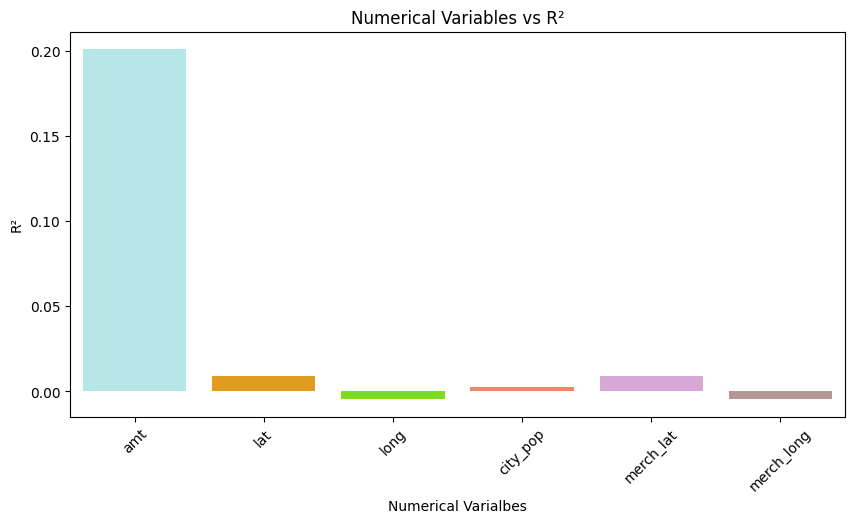

In [15]:
#Plotting bar plot to visualize Numerical Variables vs R\u00b2

plt.figure(figsize=(10, 5))

sns.barplot(x = corr.index, y = corr.values, palette=['paleturquoise', 'orange', 'lawngreen', 'coral', 'plum', 'rosybrown'])
plt.title('Numerical Variables vs R\u00b2')
plt.xticks(rotation=45)
plt.xlabel('Numerical Varialbes')
plt.ylabel('R\u00b2')
plt.show()

## Analysing Categorical Variables

In [16]:
#Selecting only the categorical variables
cat_variables_df = dataset.select_dtypes('object')
cat_variables_description = cat_variables_df.describe()
cat_variables_description

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num
count,339607,339607,339607,339607,339607,339607,339607,339607
unique,338504,693,14,176,13,163,187,339607
top,2019-12-09 17:30:34,Kilback LLC,gas_transport,Phoenix,CA,"Surveyor, minerals",1987-04-23,1f76529f8574734946361c461b024d99
freq,3,1149,35089,7297,80495,6589,4386,1


### Unique values in each category

In [17]:
#To observe the number of unique categories in each of the categorical columns
cat_variables_description.iloc[1, :]

trans_date_trans_time    338504
merchant                    693
category                     14
city                        176
state                        13
job                         163
dob                         187
trans_num                339607
Name: unique, dtype: object

#### Performing Chi-Square Test of Independence for Categorical Features


In [18]:
from scipy.stats import chi2_contingency

#Selecting the categorical features
categorical_cols = dataset.select_dtypes(include = ['object'])

chi_results = {}

for cat_col in categorical_cols:
    contingency_table = pd.crosstab(dataset[cat_col], dataset['is_fraud']) 
    # pd.crosstab(dataset[cat_col], dataset['is_fraud']) 
    # This will give a cross table with fraud values as 0 and 1 as cols and like each transaction columns
    # values as row for example
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_results[cat_col] = {'Chi-Square' : chi2, 'p-value': p}

In [19]:
chi_results_df = pd.DataFrame(chi_results).T

#Ordering the rows of dataframe based on p-value.
chi_results_df = chi_results_df.sort_values(by = ['p-value'], ascending = True)
chi_results_df

,Chi-Square,p-value
city,31570.202091,0.000000e+00
job,29197.252678,0.000000e+00
dob,37423.425681,0.000000e+00
category,1417.008486,3.323232e-295
merchant,2144.122007,4.166961e-148
state,130.571299,4.739550e-22
trans_date_trans_time,338808.743360,3.548401e-01
trans_num,339607.000000,4.991932e-01


In [20]:
#To get a summary of the categorical features to select and neglect

selected_cat_features = []
unselected_cat_features = []

for feature, result in chi_results.items():
    # here feature is the key, result is the value of the dictionary
    selected_cat_features.append(feature) if result['p-value'] < 0.05 else unselected_cat_features.append(feature)

for feature in selected_cat_features:
    print(f"The feature '{feature}' is statistically significant and will be kept.")

for feature in unselected_cat_features:
    print(f"The feature '{feature}' is not statistically significant and can be rejected.")

The feature 'merchant' is statistically significant and will be kept.
The feature 'category' is statistically significant and will be kept.
The feature 'city' is statistically significant and will be kept.
The feature 'state' is statistically significant and will be kept.
The feature 'job' is statistically significant and will be kept.
The feature 'dob' is statistically significant and will be kept.
The feature 'trans_date_trans_time' is not statistically significant and can be rejected.
The feature 'trans_num' is not statistically significant and can be rejected.


The features ‘Category’, ‘Merchant’, ‘State’, ‘DOB’, ‘Job’, and ‘City’ have low p-values, which suggests that they are statistically significant and likely have a meaningful impact on the target variable. These features are potentially important predictors in the model.

On the other hand, the features ‘trans_date_trans_time’ and ‘trans_num’ have high p-values. This indicates that there is a greater chance that the observed correlation in the data occurred by chance, and these features may not be significant predictors for the target variable.

In this analysis, a p-value threshold of 0.05 is used. Features with a p-value less than or equal to 0.05 are considered statistically significant and are retained for further analysis. Features with a p-value greater than 0.05 are not considered statistically significant and are not included in the model.

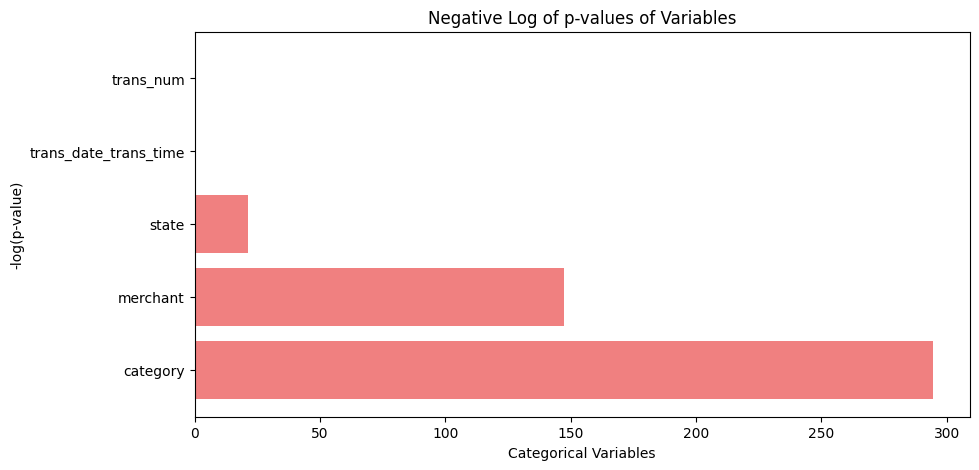

In [21]:
# Calculate -log(p-values) with a small constant added to avoid return inf for -log(0)
minus_log_pvalues = -np.log10(chi_results_df['p-value'] + 1e-350)

# Bar plot of -log(p-values)
plt.figure(figsize=(10, 5))
plt.barh(chi_results_df.index, minus_log_pvalues, color = 'lightcoral')
plt.ylabel('-log(p-value)')
plt.xlabel('Categorical Variables')
plt.title('Negative Log of p-values of Variables')
plt.show()


# Bar plot of Chi-square values


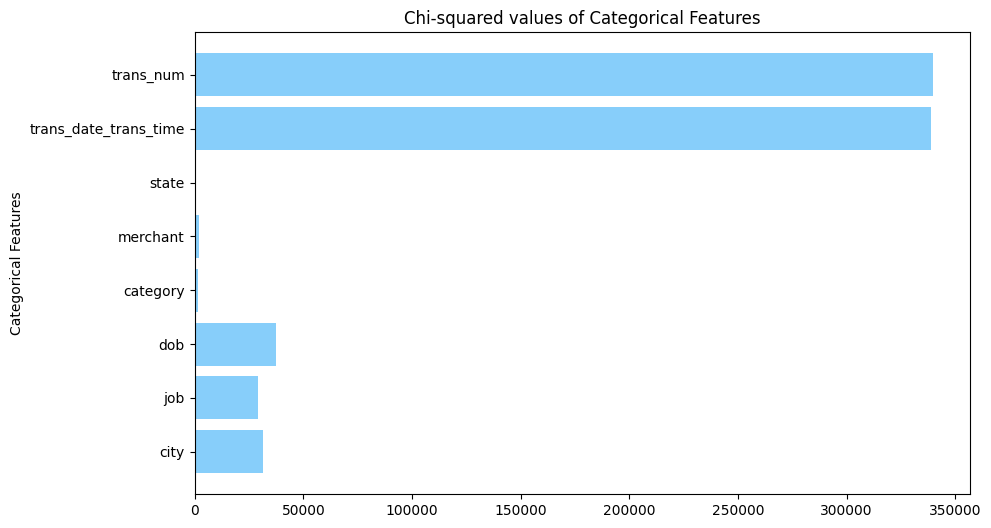

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(chi_results_df.index, chi_results_df['Chi-Square'], color = 'lightskyblue')
plt.ylabel('Categorical Features')
plt.title('Chi-squared values of Categorical Features')

plt.show()

# Data Cleaning

### Filtering out unnecessary features based on above observations

In [23]:
#Selected relevant features we choose to keep in our dataset
relevant_features = ['merchant', 'category', 'amt', 'state', 'city', 'job', 'dob', 'is_fraud'] 

filtered_dataset = dataset[relevant_features]
filtered_dataset.head(n=2)

,merchant,category,amt,state,city,job,dob,is_fraud
0,"Heller, Gutmann and Zieme",grocery_pos,107.23,WA,Orient,Special educational needs teacher,1978-06-21,0
1,Lind-Buckridge,entertainment,220.11,ID,Malad City,Nature conservation officer,1962-01-19,0


In [24]:
filtered_dataset.shape

(339607, 8)

### Checking for duplicate and missing values

In [25]:
#Checking for duplicated samples

filtered_dataset.duplicated().sum()

165

After filtering out the irrelevant features our dataset reflects 165 duplicated samples

In [26]:
#The duplicated records have been removed

filtered_dataset.drop_duplicates(inplace = True)

In [27]:
#checking for missing values

filtered_dataset.isna().sum()

merchant    0
category    0
amt         0
state       0
city        0
job         0
dob         0
is_fraud    0
dtype: int64

### seeing the summary of the filtered dataset

Dataset is free from missing values

In [28]:
# to get a descriptive statistics of the filtered numerical cols

print(filtered_dataset.describe())

                 amt       is_fraud
count  339442.000000  339442.000000
mean       70.598118       0.005250
std       161.709672       0.072265
min         1.000000       0.000000
25%         9.610000       0.000000
50%        46.480000       0.000000
75%        83.360000       0.000000
max     28948.900000       1.000000


In [29]:
# to get a descriptive statistics of the filtered categorical cols

print(filtered_dataset.select_dtypes('object').describe())

           merchant       category   state     city                 job  \
count        339442         339442  339442   339442              339442   
unique          693             14      13      176                 163   
top     Kilback LLC  gas_transport      CA  Phoenix  Surveyor, minerals   
freq           1148          35072   80465     7293                6583   

               dob  
count       339442  
unique         187  
top     1987-10-28  
freq          4380  


# Feature Engineering

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. 


## Changing Column Names

This is more of a data cleaning step than feature engineering, but it’s still important. Having clear and descriptive column names can make the dataset easier to understand and work with. For example, changing the column name of 'amt' to 'amount'.

## Encoding Categorical Variables

Many machine learning models require numerical input and cannot work with categorical data directly. Encoding categorical variables is a way to transform categorical data into a format that can be used by these models.

## Scaling Continuous Variables

Scaling is a technique used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Scaling ensures that all data in a dataset falls in the same range, thus preventing any one variable from dominating others due to its scale. 

### Changing Column Names

Here we are changing the column name amt -> amount for clarity

In [30]:
#To rename amt -> amount

filtered_dataset.rename(columns= {'amt': 'amount'}, inplace = True)

### Encoding Categorical Variables

#### 1. Converting DOB to Age

We plan on converting the 'dob' column values to age using the find and replace method. Currently, the 'dob' column is treated as a categorical variable, containing approximately 187 unique values. Encoding such a variable could lead to a high-dimensional dataset, which might complicate the modeling process. 

Instead, a more efficient approach is to convert 'dob' into a numerical variable by transforming these dates of birth into ages. This not only reduces the complexity of the data cleaning process but also may improve the performance of our machine learning model by providing a more meaningful representation of the data.


In [31]:
from datetime import datetime

# Convert 'dob' to datetime
filtered_dataset['dob'] = pd.to_datetime(filtered_dataset['dob'])

# Calculate 'age' from 'dob'
current_year = datetime.now().year
filtered_dataset['age'] = current_year - filtered_dataset['dob'].dt.year

In [32]:
#Removing the dob column after converting it to age
filtered_dataset.drop(['dob'], axis=1, inplace=True)

#### 2. Binary Encoding

We decided to use binary encoding to encode the categorical features: merchant, category, state, city, and job. 

We considered different encoding mechanisms such as label encoding and one-hot encoding. However, we decided to go with binary encoding due to the following reasons:

- Our categorical variables have many unique values. For example, 'merchant' has 693 unique values, 'category' has 14, 'state' has 13, 'city' has 176, and 'job' has 163. Therefore, using one-hot encoding would massively increase the number of columns and could significantly affect the performance of the model.

- We chose not to go with label encoding. While label encoding is straightforward, it has the disadvantage that the numeric values can be "misinterpreted" by the algorithms. It is not always suitable to directly represent each category with numerical values as it might give the model a wrong impression.

As a solution, we decided to go with binary encoding. Binary encoding is a combination of both label encoding and one-hot encoding. It maintains the dimensionality and reduces the number of columns to 37, thereby reducing the ordinal relationship in the column as well.


In [33]:
import category_encoders as ce

# Get a list of relevant cols to be encoded.
cat_cols = list(filtered_dataset.select_dtypes('object').columns)


# The BinaryEncoder will encode the categorical variables into binary vectors. 
# The cols parameter specifies which columns in the DataFrame should be encoded
encoder = ce.BinaryEncoder(cols= cat_cols)

# The fit_transform method first fits the encoder to the data and then transforms the data into binary vectors
data = encoder.fit_transform(filtered_dataset)

In [34]:
data.dtypes

merchant_0      int64
merchant_1      int64
merchant_2      int64
merchant_3      int64
merchant_4      int64
merchant_5      int64
merchant_6      int64
merchant_7      int64
merchant_8      int64
merchant_9      int64
category_0      int64
category_1      int64
category_2      int64
category_3      int64
amount        float64
state_0         int64
state_1         int64
state_2         int64
state_3         int64
city_0          int64
city_1          int64
city_2          int64
city_3          int64
city_4          int64
city_5          int64
city_6          int64
city_7          int64
job_0           int64
job_1           int64
job_2           int64
job_3           int64
job_4           int64
job_5           int64
job_6           int64
job_7           int64
is_fraud        int64
age             int32
dtype: object

In [35]:
data.head()

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,is_fraud,age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,46
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,62
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,79
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,57
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,57


### Scaling Numerical Variables

In this section, we handle feature normalization to scale the numerical columns ‘amount’ and ‘age’. These two features have very different scales, which can potentially impact the performance of some machine learning algorithms.

The dataset we’re working with doesn’t follow a bell curve (or Gaussian distribution), which is why we’re choosing to use Min-Max scaling for these numerical features. Min-Max scaling is a technique that transforms the features to fall within a specified range, typically between 0 and 1. This ensures that all features contribute approximately proportionately to the final prediction.

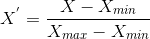

However, Min-Max scaling is sensitive to outliers, which are uncommon values that occur in a dataset. Outliers can skew the distribution of the data and potentially affect the performance of a machine learning model. Therefore, before we apply Min-Max scaling, we’ll first remove the outliers from the dataset.


In [36]:
# Calculate the 25th, 50th, and 75th percentiles of the 'amount' column
quantiles_amount = data.amount.quantile([.25, .5, .75])

# Store the 25th percentile in Q1_amount
Q1_amount = quantiles_amount[.25]

# Store the 75th percentile in Q3_amount
Q3_amount = quantiles_amount[.75]

# Calculate the Interquartile Range (IQR) for 'amount'
IQR_amount = Q3_amount - Q1_amount

# Calculate the lower bound for detecting outliers in 'amount' as 1.5*IQR below Q1_amount
lower_range_amount = Q1_amount - (1.5 * IQR_amount)

# Calculate the upper bound for detecting outliers in 'amount' as 1.5*IQR above Q3_amount
upper_range_amount = Q3_amount + (1.5 * IQR_amount)

# Calculate the 25th, 50th, and 75th percentiles of the 'age' column
quantiles_age = data.age.quantile([.25, .5, .75])

# Store the 25th percentile in Q1_age
Q1_age = quantiles_age[.25]

# Store the 75th percentile in Q3_age
Q3_age = quantiles_age[.75]

# Calculate the Interquartile Range (IQR) for 'age'
IQR_age = Q3_age - Q1_age

# Calculate the lower bound for detecting outliers in 'age' as 1.5*IQR below Q1_age
lower_range_age = Q1_age - (1.5 * IQR_age)

# Calculate the upper bound for detecting outliers in 'age' as 1.5*IQR above Q3_age
upper_range_age = Q3_age + (1.5 * IQR_age)

# Filter the data to include only rows where 'amount' and 'age' are within the lower and upper bounds
dataset_without_outliers = data[(data.amount >= lower_range_amount) & (data.amount <= upper_range_amount) & (data.age >= lower_range_age) & (data.age <= upper_range_age)]

# Reset the index of the DataFrame and drop the old index column
dataset_without_outliers.reset_index(inplace = True)
dataset_without_outliers.drop('index', axis=1, inplace=True)


In [37]:
# Replace the original 'data' DataFrame with the 'dataset_without_outliers' DataFrame
# This means that all future operations that use the 'data' DataFrame will be using the data without outliers

data = dataset_without_outliers

Here we choose to go with min-max algorithm as our dataset doenst really follow a normal distribution and also we have removed the outliers in the dataset since it is slightly bit 

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns you want to scale
columns_to_scale = ['amount', 'age']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns from the DataFrame and transform the data
scaled_data = scaler.fit_transform(data[columns_to_scale])

# Replace the original columns with the scaled ones
data[columns_to_scale] = scaled_data

In [39]:
data.head(5)

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,is_fraud,age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.310811
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0.756757
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.459459
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0.459459
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0.472973


## Handling Class Imbalance

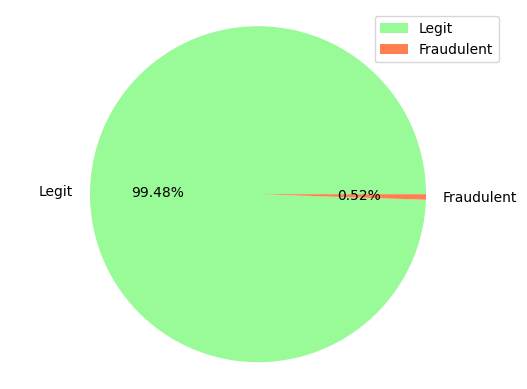

In [40]:
plt.pie(filtered_dataset.is_fraud.value_counts(), autopct = '%.2f%%', labels = ['Legit', 'Fraudulent'], colors = ['palegreen', 'coral'])
plt.legend()
plt.axis('equal')
plt.show()

In [41]:
data.is_fraud.value_counts()

is_fraud
0    320958
1       444
Name: count, dtype: int64

The target variable, 'is_fraud', is a binary variable. However, we observe a significant class imbalance in the dataset. Approximately 99.48% of the 339442 records are legitimate transactions, compared to only 0.52% that are fraudulent transactions.

Class imbalance can bias the predictive model towards the majority class, reducing the model's ability to identify the minority class. To counter this, we can use different data balancing techniques. The techniques considered for this project include:

1. **Undersampling the majority class**: This involves reducing the number of instances from the majority class to match the minority class. However, undersampling can lead to loss of information.

2. **Oversampling the minority class by duplication**: This involves duplicating instances from the minority class to match the majority class. However, oversampling by duplication can lead to overfitting due to exact replication of instances.

3. **Oversampling the minority class using Synthetic Minority Over-sampling Technique (SMOTE)**: SMOTE works by generating synthetic examples from the minority class. It helps to overcome the overfitting problem posed by random oversampling.

Given that the majority class has 337660 instances and the minority class has only 1782, undersampling the majority class would lead to a significant reduction in our dataset. On the other hand, oversampling the minority class by duplication would require replicating the minority class approximately 189 times, leading to excessive duplication.

Therefore, we prefer to use SMOTE, which provides a balance between preserving the majority class data and augmenting the minority class without excessive duplication.

### Oversampling the minority class using Synthetic Minority Over-sampling Technique (SMOTE)

An oversampling method, SMOTE creates new, synthetic observations from present samples of the minority class. Not only does it duplicate the existing data, it also creates new data that contains values that are close to the minority class with the help of data augmentation. These new synthetic training records are made randomly by selecting one or more K-nearest neighbors for each of the minority classes. After completing oversampling, the problem of an imbalanced dataset is resolved and we are ready to test different classification models

In [42]:
X = data.drop('is_fraud', axis=1)  # Selecting the features only without the target variable
y = data['is_fraud']  # Selecting the target variable

In [43]:
X.head()

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,city_7,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,age
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0.310811
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,1,0.756757
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.459459
3,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0.459459
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0.472973


In [44]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(sampling_strategy=0.5, random_state= 100, k_neighbors= 5)
X_smote, y_smote = smote.fit_resample(X, y) 

In [45]:
y_smote.value_counts()

is_fraud
0    320958
1    160479
Name: count, dtype: int64

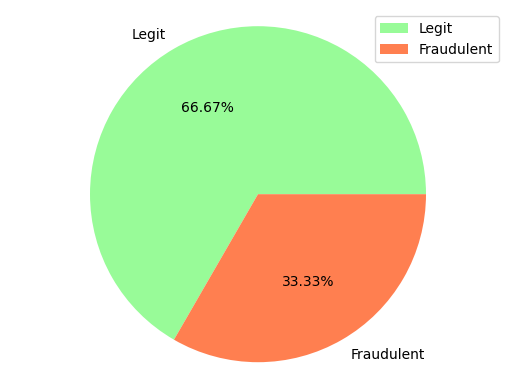

In [46]:
# Count the number of samples in each class after oversampling the minority class using SMOTE
unique, counts = np.unique(y_smote, return_counts=True)

# Plotting the class distribution after smote using a pie chart
plt.pie(y_smote.value_counts(), labels = ['Legit', 'Fraudulent'], colors = ['palegreen', 'coral'], autopct = '%.2f%%')
plt.legend()
plt.axis('equal')
plt.show()

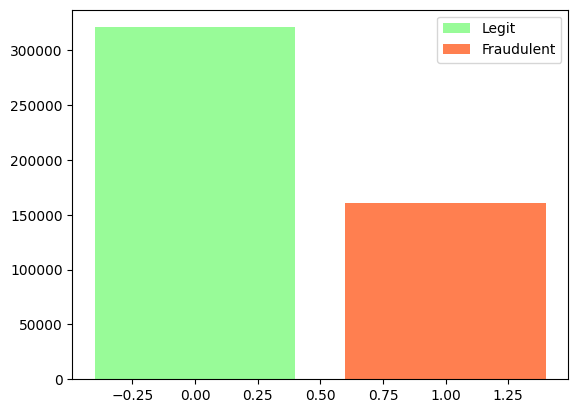

In [47]:
# Plotting the class distribution after smote using a bar chart

legit = y_smote[y_smote == 0]
fraudulent = y_smote[y_smote == 1]

plt.bar(0, len(legit), color='palegreen', label='Legit')
plt.bar(1, len(fraudulent), color='coral', label='Fraudulent')

plt.legend(loc='upper right')
plt.show()

# IMPLEMENTATION OF THE MODELS

## 1. Logistic Regression

Here we are doing cross validation for the dataset instead of simply splitting it into train and test partitions.

### Cross-Validation using k-Folds

In machine learning, when we're evaluating our models, it's crucial to ensure that our assessment is robust and not biased by the specific train-test split we choose. One way to achieve this is through cross-validation, specifically k-fold cross-validation.

### What is k-Fold Cross-Validation?

In k-fold cross-validation, the dataset is divided into k subsets, or "folds," of approximately equal size. The model is then trained and evaluated k times, using a different fold for evaluation each time while the remaining k-1 folds are used for training. This process ensures that every data point is used for both training and validation, providing a more reliable estimate of the model's performance.

### Advantages of k-Fold Cross-Validation:

1. **Robustness:** By rotating through different subsets of the data for training and validation, k-fold cross-validation helps mitigate the risk of overfitting to any particular subset.

2. **Better Accuracy Estimation:** Since the model is trained and tested on multiple subsets of the data, the resulting accuracy estimate is likely to be more representative of the model's true performance on unseen data.

3. **Optimized Hyperparameter Tuning:** When tuning hyperparameters or comparing different models, k-fold cross-validation allows for a more thorough and fair evaluation, as it provides multiple performance metrics for each configuration.


### a. Without Hyper Parameter Tuning

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
logistic_model = LogisticRegression()

# Fit the classifier
logistic_model.fit(X_smote, y_smote)

LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(logistic_model, X_smote, y_smote, cv=5)

# Calculate cross-validation scores
scores = cross_val_score(logistic_model, X_smote, y_smote, cv=5, scoring='accuracy')

# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy : .2f}')

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_smote, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy : .2f}')

Mean Accuracy:  0.83
Cross-Validation Accuracy:  0.83


Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.90      0.88    320958
           1       0.77      0.71      0.74    160479

    accuracy                           0.83    481437
   macro avg       0.82      0.80      0.81    481437
weighted avg       0.83      0.83      0.83    481437


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,287464,33494
Actual Positive,46472,114007


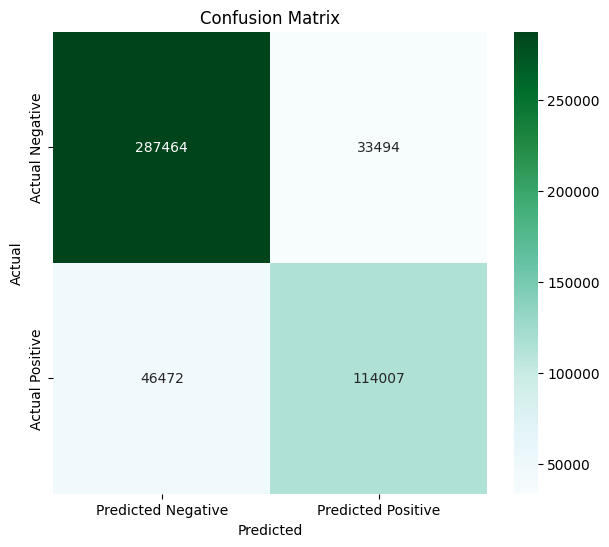

In [50]:
# Print classification report for cross-validated predictions
classification_rep = classification_report(y_smote, y_pred_cv)
print("Classification Report: \n\n {}".format(classification_rep))

# Create a confusion matrix for cross-validated predictions
confusion_mat = confusion_matrix(y_smote, y_pred_cv)

# Convert confusion matrix to DataFrame for better formatting and display
confusion_df = pd.DataFrame(confusion_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Display the confusion matrix
print("\nConfusion Matrix:")
display(confusion_df)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot=True, fmt="g", cmap='BuGn') #fmt g is to show the entire number without the e term
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The `classification_report` function from the `sklearn.metrics` module is used to generate a report that shows some of the main classification metrics. The output of this function includes precision, recall, and F1-score for each class, as well as the averages of these metrics.

Here's what each of these terms means:

- **Precision**: Precision is the fraction of relevant instances among the retrieved instances. In other words, it answers the question: What proportion of positive identifications was actually correct? It is defined as the number of true positives (TP) divided by the sum of true positives and false positives (FP). A model that produces no false positives has a precision of 1.0.

- **Recall**: Also known as sensitivity or the true positive rate, recall is the fraction of relevant instances that were retrieved. It answers the question: What proportion of actual positives was identified correctly? It is defined as the number of true positives (TP) divided by the sum of true positives and false negatives (FN). A model that produces no false negatives has a recall of 1.0.

- **F1-Score**: The F1 score is a measure of a model's accuracy that takes both precision and recall into account. It is the harmonic mean of precision and recall, providing a balance between the two. The F1 score is especially useful in situations where the positive class is much smaller than the negative class, which is often the case in real-world problems.

A **Confusion Matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

The confusion matrix itself is relatively simple to understand, and some of the basic terminology is provided below:

- **True Positives (TP)**: These are cases in which we predicted yes (the digit), and the actual output was also yes (the digit).
- **True Negatives (TN)**: We predicted no, and the actual output was no.
- **False Positives (FP)**: We predicted yes, but the actual output was no. Also known as "Type I error".
- **False Negatives (FN)**: We predicted no, but the actual output was yes. Also known as "Type II error".

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class. The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In terms of improving the classification accuracy using the confusion matrix, here are a few strategies:

1. **Error Analysis**: By looking at the confusion matrix, you can get a better understanding of what types of errors your classifier is making¹. For example, if a certain class has a high number of false positives, you might want to focus on improving the classification of that class.

2. **Balancing the Dataset**: If the dataset is imbalanced, the confusion matrix can help identify this¹. An imbalanced dataset can lead to a high accuracy because the classifier might be biased towards the majority class. In such cases, techniques like resampling the dataset, using different evaluation metrics, or using algorithms that handle imbalance can be applied.

3. **Tuning the Model**: The confusion matrix can guide you in tuning the parameters of your model¹. For example, if the number of false positives is much higher than the number of false negatives, you might want to adjust the threshold for your classifier.

4. **Ensemble Methods**: If you have multiple models, you can compare their confusion matrices and combine the models to get better results¹. This is based on the idea that different models might make different types of errors, and these errors can be reduced by voting or averaging.

### b. With Hyper Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .001, .01, .1, 1, 10, 100]
}

- **penalty**: This parameter specifies the type of regularization to be applied on the model. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function that the model optimizes. The options are:
    - **'l1'**: Lasso regularization. This adds a penalty equal to the absolute value of the magnitude of coefficients.
    - **'l2'**: Ridge regularization. This adds a penalty equal to the square of the magnitude of coefficients.
    - **'elasticnet'**: This is a combination of L1 and L2 regularization. It adds a penalty term that is a mix of both L1 and L2 penalties.
    - **'none'**: No regularization is applied.

- **C**: This is the inverse of regularization strength. Smaller values specify stronger regularization. So, by varying 'C' in a logarithmic space between 0.0001 and 10000 (as done with `np.logspace(-4, 4, 20)`), we're trying a wide range of regularization strengths in the grid search.

- **solver**: This parameter specifies the algorithm to be used in the optimization problem. The options are:
    - **'newton-cg'**: Newton's method for optimization.
    - **'lbfgs'**: Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. This is the default option
    - **'liblinear'**: A library for large linear classification that uses a coordinate descent algorithm.
    - **'sag'**: Stands for Stochastic Average Gradient descent. It uses a random sample of previous gradient values.
    - **'saga'**: Stands for Stochastic Average Gradient descent with 'amoritized' variance reduction. It is a variant of 'sag' that also supports the non-smooth penalty='l1' option (i.e., L1 regularization).

The solver parameter specifies the optimization algorithm used to minimize the cost function. D

- **max_iter**: This is the maximum number of iterations for the solvers to converge. If the solver doesn't converge within this number of iterations, it will stop and return a warning. By specifying [100, 1000, 2500, 5000], we're allowing the grid search to try different limits for the number of iterations.

**Here solvers and max_iter are not optimised due to technical constraints**

In [52]:
# Create a base model
logistic_model = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator= logistic_model, param_grid= param_grid, cv= 5, scoring= 'accuracy', verbose= 2) 
#verbose 2 is to see the progress messages of the gridserach

# Fit the grid search to the data
grid_search.fit(X_smote, y_smote)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.6s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.5s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.6s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.6s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.5s
[CV] END .......................C=0.0001, penalty=elasticnet; total time=   0.0s
[CV] END .......................C=0.0001, penal

In [53]:
# Train and predict using the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_smote, y_smote)
y_pred_cv_best = cross_val_predict(best_model, X_smote, y_smote, cv=5)

In [54]:
# Calculate the cross-validation accuracy score for the model with the best parameters
cross_val_accuracy_best = accuracy_score(y_smote, y_pred_cv_best)
print(f'Cross-Validation Accuracy (Best Model): {cross_val_accuracy_best : .2f}')

Cross-Validation Accuracy (Best Model):  0.83


Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.90      0.88    320958
           1       0.77      0.71      0.74    160479

    accuracy                           0.83    481437
   macro avg       0.82      0.80      0.81    481437
weighted avg       0.83      0.83      0.83    481437


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,287922,33036
Actual Positive,46909,113570


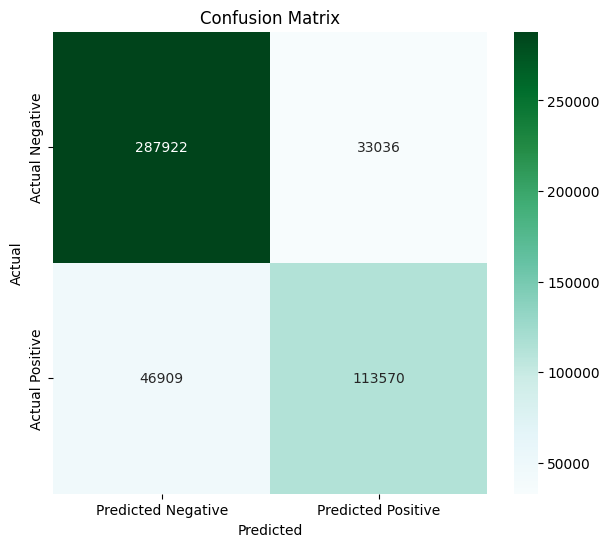

In [55]:
# Print classification report for cross-validated predictions
classification_rep = classification_report(y_smote, y_pred_cv_best)
print("Classification Report: \n\n {}".format(classification_rep))

# Create a confusion matrix for cross-validated predictions
confusion_mat = confusion_matrix(y_smote, y_pred_cv_best)

# Convert confusion matrix to DataFrame for better formatting and display
confusion_df = pd.DataFrame(confusion_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Display the confusion matrix
print("\nConfusion Matrix:")
display(confusion_df)

# Plot the confusion matrix

print('\n')
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot=True, fmt="g", cmap='BuGn') #fmt g is to show the entire number without the e term
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('\n')

In [56]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_smote, y_pred_cv)
roc_auc = auc(fpr, tpr)
roc_auc

0.8030303030303031

An ROC curve is a commonly used way to visualize the performance of a binary classifier. 

- **True Positive Rate (TPR)**, or recall, is the ratio of true positive predictions to the actual number of positive cases. It is calculated as:
$$
\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
TPR is a measure of the model's ability to correctly identify all actual positives.

- **False Positive Rate (FPR)** 

This sees out of all the actually negative classes, how many is our model says as false positive
The FPR is a measure of how many negative results are incorrectly identified as positive. It is calculated as the number of false positives divided by the total number of actual negatives (true negatives plus false positives). In mathematical terms:
$$
\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
$$

- **Objective** 

The goal is to maximize TPR (aiming for a value of 1) while minimizing FPR (aiming for a value of 0). Both TPR and FPR range between 0 and 1.

- **Area Under the Curve (AUC)** 

AUC represents the area under the ROC curve and ranges from 0 to 1. A larger AUC value indicates a better-performing model.

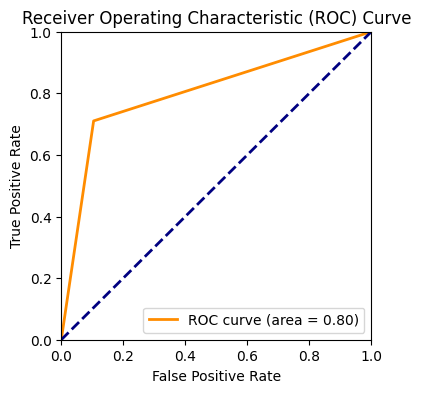

In [57]:
# Plot ROC curve
plt.figure(figsize=(4, 4)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #lw sets line width
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [58]:
# Randomly selecting a row and making prediction
random_row_no= np.random.randint(1, X.shape[0])

row_to_predict = X.iloc[random_row_no, : ].values.reshape(1, -1)  # Reshape to 2D array

# Use the trained model to predict the class for the scaled input
predicted_class = best_model.predict(row_to_predict)

# Print the predicted class
print('Selected Row Number: {}'.format(random_row_no))
print("Predicted Class: {} ".format(predicted_class[0]))
print("Actual Class: {} ".format(y[random_row_no]))

Selected Row Number: 273953
Predicted Class: 0 
Actual Class: 0 


In [59]:
# Randomly selecting a row and making prediction
random_row_no= np.random.randint(1, X.shape[0])

row_to_predict = X.iloc[random_row_no, : ].values.reshape(1, -1)  # Reshape to 2D array

# Use the trained model to predict the class for the scaled input
predicted_class = best_model.predict(row_to_predict)

# Print the predicted class
print('Selected Row Number: {}'.format(random_row_no))
print("Predicted Class: {} ".format(predicted_class[0]))
print("Actual Class: {} ".format(y[random_row_no]))

Selected Row Number: 22281
Predicted Class: 0 
Actual Class: 0 


In [60]:
from joblib import dump

# Save the model to a file
dump(logistic_model, 'models/logistic_regression_without_hyperparameter_tuning.pkl')
print("Logistic regression model saved successfully.")

Logistic regression model saved successfully.


In [61]:
from joblib import dump

# Save the model to a file
dump(best_model, 'models/logistic_regression_after_hyperparameter_tuning.pkl')
print("Best Logistic regression model saved successfully.")

Best Logistic regression model saved successfully.


## 2. K-NEAREST NEIGHBOR (KNN) MODEL

### a. Without hyper-parameter tuning

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Define K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Fit the classifier
knn_model.fit(X_smote, y_smote)

KNeighborsClassifier()

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(knn_model, X_smote, y_smote, cv= 5, verbose= 2)

# Calculate cross-validation scores
scores = cross_val_score(knn_model, X_smote, y_smote, cv= 5, scoring= 'accuracy', verbose= 2)

# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy : .2f}')

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_smote, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy : .2f}')

[CV] END .................................................... total time=  28.8s
[CV] END .................................................... total time=  29.8s
[CV] END .................................................... total time=  28.9s
[CV] END .................................................... total time=  28.3s
[CV] END .................................................... total time=  28.2s
Mean Accuracy:  1.00
Cross-Validation Accuracy:  1.00


Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    320958
           1       0.99      1.00      1.00    160479

    accuracy                           1.00    481437
   macro avg       1.00      1.00      1.00    481437
weighted avg       1.00      1.00      1.00    481437


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,319803,1155
Actual Positive,257,160222


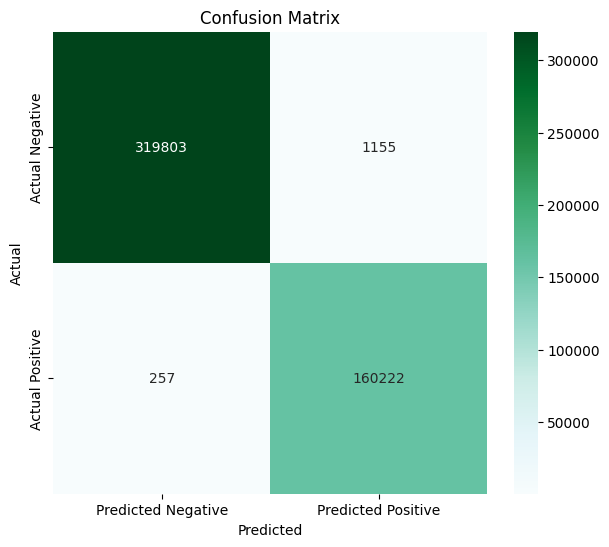

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report for cross-validated predictions
classification_rep = classification_report(y_smote, y_pred_cv)
print("Classification Report: \n\n {}".format(classification_rep))

# Create a confusion matrix for cross-validated predictions
confusion_mat = confusion_matrix(y_smote, y_pred_cv)

# Convert confusion matrix to DataFrame for better formatting and display
confusion_df = pd.DataFrame(confusion_mat, index= ['Actual Negative', 'Actual Positive'], columns= ['Predicted Negative', 'Predicted Positive'])

# Display the confusion matrix
print("\nConfusion Matrix:")
display(confusion_df)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot= True, fmt= "g", cmap= 'BuGn') #fmt g is to show the entire number without the e term
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### b. With hyper-parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter values that should be searched
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 13],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] #1 for manhattan distance and 2 for euclidean distance
}


# Instantiate the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv= 5, scoring= 'accuracy', n_jobs= -1, verbose= 3)

# Fit the grid with data
grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

- **n_neighbors**: The number of neighbors to consider when making a prediction. We're trying all values from 1 to 30.
- **weights**: Controls how the classification decision is made. The options are 'uniform' (all points in each neighborhood are weighted equally) and 'distance' (points are weighted by the inverse of their distance, so closer points have a greater influence).
- **p**: The power parameter for the Minkowski metric. When `p=1`, this is equivalent to using manhattan_distance (l1), and `p=2` corresponds to using euclidean_distance (l2). We're trying both options in our grid search.
- **cv**: The number of cross-validation folds to use. Cross-validation is a way to estimate the generalization performance of a model, by splitting the data into `k` folds and doing `k` iterations where each fold is used once as the validation set.
- **scoring**: The scoring metric to use. In our case, we're using 'accuracy', which is the fraction of correctly classified samples.
- **n_jobs**: The number of jobs to run in parallel. `-1` means using all processors.


In [66]:
# Examine the best model
print('Best Score: {}'.format(grid.best_score_))
print('Best Parameter values: {}'.format(grid.best_params_))

Best Score: 0.9982240703027919
Best Parameter values: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [67]:
best_params= grid.best_params_

best_knn_classifer= KNeighborsClassifier(n_neighbors= best_params.get('n_neighbors'), p= best_params.get('p'), weights= best_params.get('weights'))
best_knn_classifer.fit(X_smote, y_smote)                           

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(best_knn_classifer, X_smote, y_smote, cv=5, verbose=2)

# Calculate cross-validation scores
scores = cross_val_score(best_knn_classifer, X_smote, y_smote, cv=5, scoring='accuracy', verbose= 2)

# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy : .2f}')

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_smote, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy : .2f}')

[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.7min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.7min
[CV] END .................................................... total time= 1.7min
Mean Accuracy:  1.00
Cross-Validation Accuracy:  1.00


Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    320958
           1       1.00      1.00      1.00    160479

    accuracy                           1.00    481437
   macro avg       1.00      1.00      1.00    481437
weighted avg       1.00      1.00      1.00    481437


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,320433,525
Actual Positive,330,160149


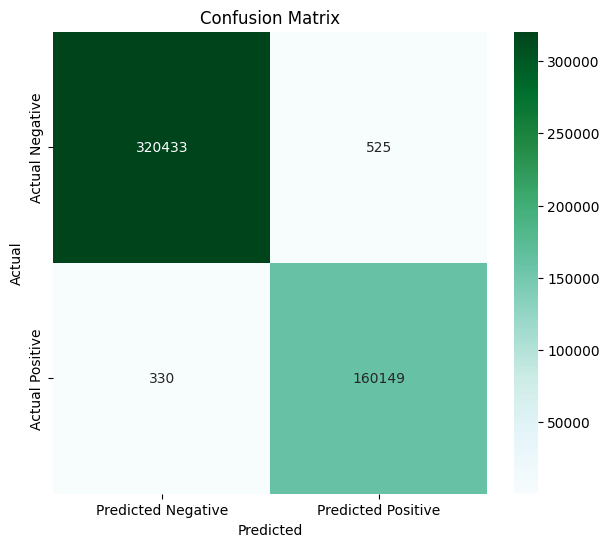

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report for cross-validated predictions
classification_rep = classification_report(y_smote, y_pred_cv)
print("Classification Report: \n\n {}".format(classification_rep))

# Create a confusion matrix for cross-validated predictions
confusion_mat = confusion_matrix(y_smote, y_pred_cv)

# Convert confusion matrix to DataFrame for better formatting and display
confusion_df = pd.DataFrame(confusion_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Display the confusion matrix
print("\nConfusion Matrix:")
display(confusion_df)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot=True, fmt="g", cmap='BuGn') #fmt g is to show the entire number without the e term
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [70]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_smote, y_pred_cv)
roc_auc = auc(fpr, tpr)

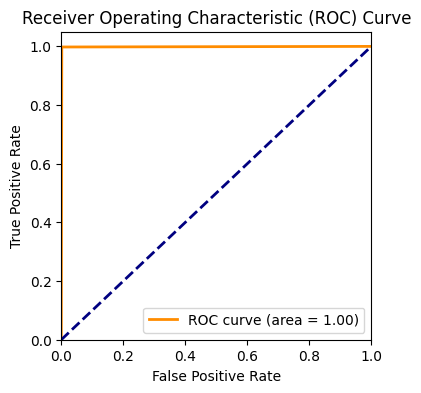

In [71]:
# Plot ROC curve
plt.figure(figsize=(4, 4)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [72]:
# Randomly selecting a row and making prediction
random_row_no= np.random.randint(1, X.shape[0])

row_to_predict = X.iloc[random_row_no, : ].values.reshape(1, -1)  # Reshape to 2D array

# Use the trained model to predict the class for the scaled input
predicted_class = best_knn_classifer.predict(row_to_predict)

# Print the predicted class
print('Selected Row Number: {}'.format(random_row_no))
print("Predicted Class: {} ".format(predicted_class[0]))
print("Actual Class: {} ".format(y[random_row_no]))

Selected Row Number: 207524
Predicted Class: 0 
Actual Class: 0 


In [73]:
# Randomly selecting a row and making prediction
random_row_no= np.random.randint(1, X.shape[0])

row_to_predict = X.iloc[random_row_no, : ].values.reshape(1, -1)  # Reshape to 2D array

# Use the trained model to predict the class for the scaled input
predicted_class = best_knn_classifer.predict(row_to_predict)

# Print the predicted class
print('Selected Row Number: {}'.format(random_row_no))
print("Predicted Class: {} ".format(predicted_class[0]))
print("Actual Class: {} ".format(y[random_row_no]))

Selected Row Number: 155833
Predicted Class: 0 
Actual Class: 0 


In [74]:
from joblib import dump

# Save the model to a file
dump(knn_model, 'models/knn_classifier_without_hyperparameter_tuning.pkl')
print("knn classifier saved successfully!")

knn classifier saved successfully!


In [75]:
from joblib import dump

# Save the model to a file
dump(best_knn_classifer, 'models/knn_classifier_after_hyperparameter_tuning.pkl')
print("Best Logistic knn classifier saved successfully!")

Best Logistic knn classifier saved successfully!


## 3. Naive Bayes 

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have your data X_smote and corresponding labels y_smote

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define Naive Bayes model (Gaussian Naive Bayes in this case)
naive_bayes_model = GaussianNB()

# Train the Naive Bayes classifier
naive_bayes_model.fit(X_train, y_train)

# Test the classifier
y_pred = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes model:", accuracy)


Accuracy of Naive Bayes model: 0.7912824027916251


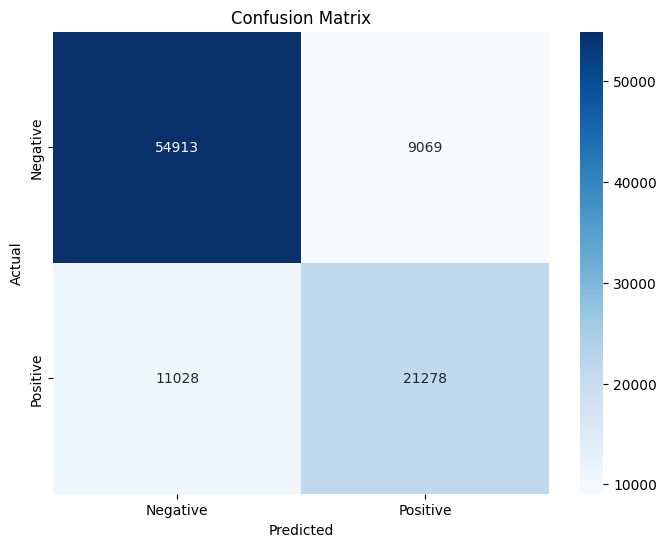

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Mean Accuracy:  0.79
Cross-Validation Accuracy:  0.79


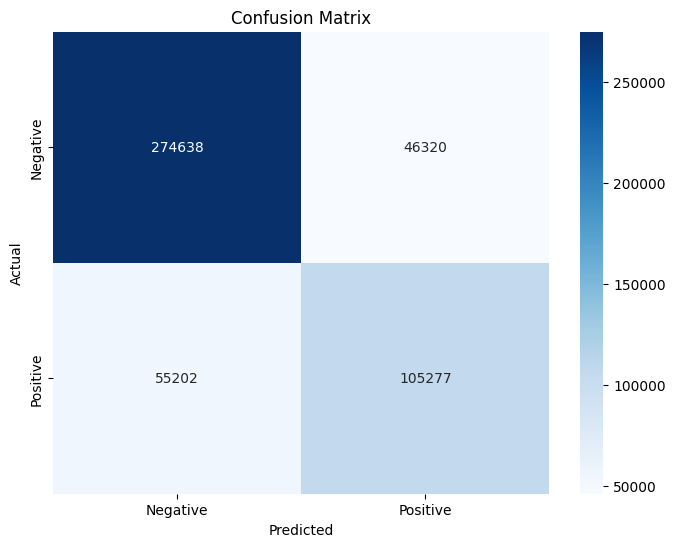

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84    320958
           1       0.69      0.66      0.67    160479

    accuracy                           0.79    481437
   macro avg       0.76      0.76      0.76    481437
weighted avg       0.79      0.79      0.79    481437



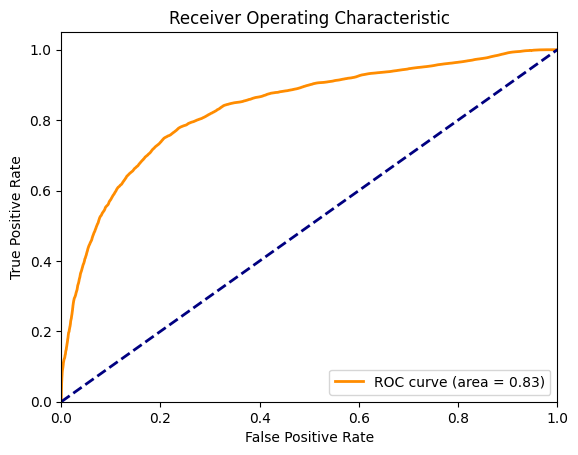

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_smote and y_smote are defined and imported

# Define Naive Bayes model (Gaussian Naive Bayes in this case)
naive_bayes_model = GaussianNB()

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(naive_bayes_model, X_smote, y_smote, cv=5)

# Calculate cross-validation scores
scores = cross_val_score(naive_bayes_model, X_smote, y_smote, cv=5, scoring='accuracy')

# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy : .2f}')

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_smote, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy : .2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_smote, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_smote, y_pred_cv)
print("Classification Report:")
print(class_report)

# Plot ROC curve
y_scores = cross_val_predict(naive_bayes_model, X_smote, y_smote, cv=5, method="predict_proba")[:, 1]
fpr, tpr, thresholds = roc_curve(y_smote, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [79]:
from joblib import dump

# Save the model to a file
dump(naive_bayes_model, 'models/naive_bayes_model.pkl')
print("Naive Bayes model saved successfully!")

Naive Bayes model saved successfully!
